## $\textit{Xola Ndaliso (NDLXOL020)}$

### $\textit{Computational Astrophysics Assignment 1}$

### $\textit{Question 1}$

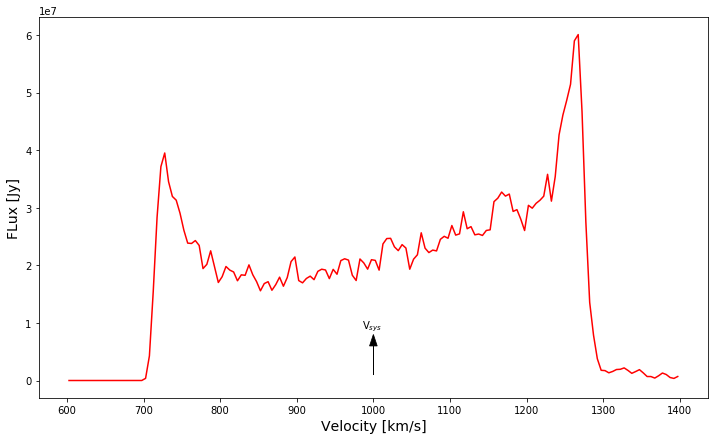

Ratio of fluxes =  0.7104927630651524


In [3]:
import numpy as np
import pylab as pl
import scipy as sp
import matplotlib.patches as patches

data = open('Data/Question1_SampleVelocityProfile.txt', 'r')

x, y = [], []
for line in data:
    
    x.append(line.split()[0])
    y.append(line.split()[1])

vel, flux = np.zeros(len(x[1:])), np.zeros(len(x[1:]))
for i in range(len(x[1:])):
    
    vel[i] = float(x[1:][i])
    flux[i] = float(y[1:][i])

pl.figure(figsize = (12, 7))
pl.plot(vel, flux, 'r')
pl.arrow(1000, 0.1e7, 0, .5e7, color = 'k', head_width = 10, head_length = .2e7, linewidth = 0.75)
pl.text(985, 0.9e7, 'V$_{sys}$')
pl.xlabel('Velocity [km/s]', fontsize = 14)
pl.ylabel('FLux [Jy]', fontsize = 14)
pl.savefig('profile.eps', format = 'eps', dpi = 150)
pl.show()

v_sys = np.where(vel >= 1000)
low_vel = flux[:v_sys[0][0]]
high_vel = flux[v_sys[0][0]:]
print('Ratio of fluxes = ', sum(low_vel)/sum(high_vel))

### $\textit{Question 2}$


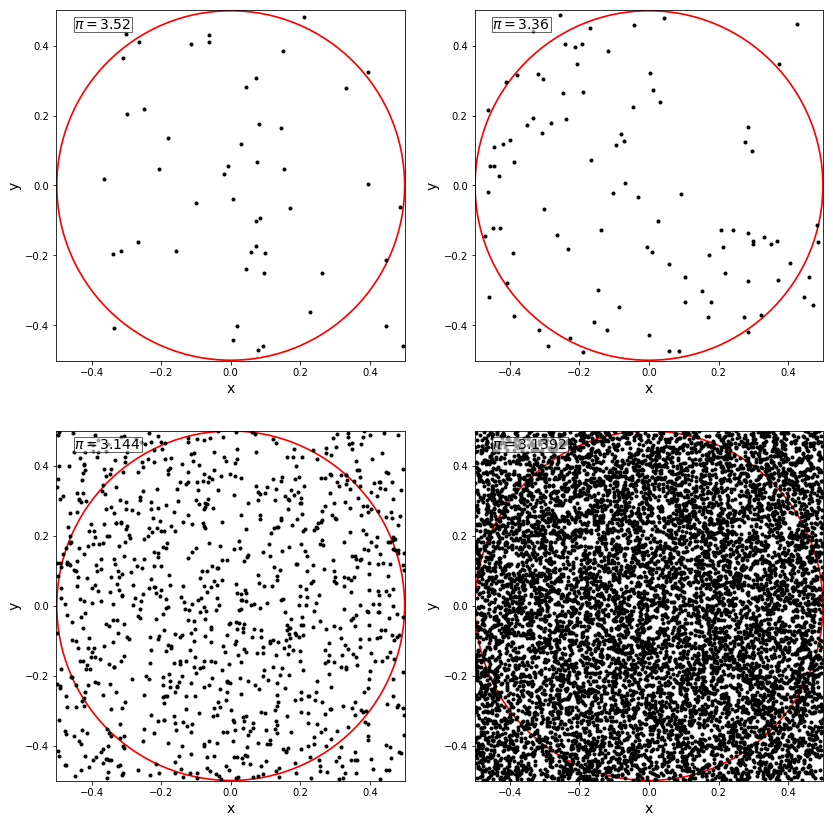

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Circle

left, width = 1., 1.
bottom, height = 1., 1.

points = [50, 100, 1000, 10000]

for i in range(len(points)):
    
    randm = np.random.rand(points[i])
    x, y = np.random.uniform(-0.5, 0.5, len(randm)), np.random.uniform(-.5, .5, len(randm))
    sq, cir = [], []
    for j in range(len(x)):
        if (x[j]**2.) + (y[j]**2.0) >= ((0.5)**2.):
            sq.append(y[j])
        else:
            cir.append(y[j])
    pi = 4.*(len(cir)/len(randm))
    pl.subplot(220 + i + 1)
    pl.plot(x, y, 'k.')
    pl.xlabel('x', fontsize = 14)
    pl.ylabel('y', fontsize = 14)
    pl.text(-0.45, 0.45, '$\pi = $'+str(pi), bbox={'facecolor':'White', 'alpha':0.6, 'pad':0.6}, fontsize = 14)
    plt.ylim([-0.501, 0.501])
    plt.xlim([-.501, .501])
    ax = pl.gca()
    ax.add_patch(Circle((0., 0.), 0.5, facecolor = 'none', edgecolor = 'r', linewidth = 1.7))


pl.subplots_adjust(right = 1.9, top = 2.8)
#pl.savefig('pi_approx.eps', format = 'eps', dpi = 150)
pl.show()

### $\textit{Question 3}$

0.21581794949925887 0.29297942935551374


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


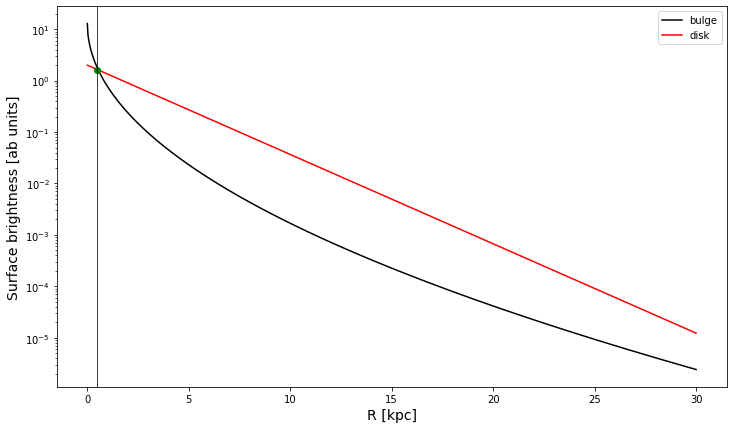

At R ~ 0.5 kpc, the disk brightness equals the bulge brightness


In [4]:
#3
def gal_components(R, g):
    
    I_0 = 35
    R_e = 0.5
    n = 2.
    I_e = 2.
    R_d = 2.5
    b = 2*n - 2
    
    if g == 0:
         return I_0*np.exp(-b*((R/R_e)**(1/n)) - 1)
    else:
        return I_e*np.exp(-R/R_d)
    
R = np.linspace(0., 30, 1000)

def f(R):
    
    I_0 = 35
    R_e = 0.5
    n = 2.
    I_e = 2.
    R_d = 2.5
    b = 2*n - 2

    return np.exp(-b*(R/R_e)**(1./n) + (R/R_d))

#Fixed-point method

R_0 = 0.35    #initial guess

for i in range(len(R)):  #implementing the root-finding method


    Rn = f(R_0)
    R_0 = Rn
    
    if gal_components(R_0, 0) - gal_components(R_0, 9) >= 0.:
        print(R_0, f(R_0))
        break
        
#Bisection method

a = -1      #initial interval
b = 2
      
for i in range(len(R)):

    c = (a + b)/2.
    
    if gal_components(R_0, 0) - gal_components(R_0, 9):
        #print(c, f(c))
        break
    
    if f(c)*f(a) < 0.:
        b = c
    else:
        a = c
pl.figure(figsize = (12, 7))
pl.semilogy(R, gal_components(R, 0), 'k-', label = 'bulge')
pl.semilogy(R, gal_components(R, 100), 'r-', label = 'disk')
pl.plot(c, gal_components(c, 9), 'go')
pl.axvline(c, color = 'k', linewidth = 0.75)
pl.xlabel('R [kpc]', fontsize = 14)
pl.ylabel('Surface brightness [ab units]', fontsize = 14)
pl.legend()
pl.savefig('db_profile.eps', format = 'eps', dpi = 150)
pl.show()
print('At R ~',c, 'kpc, the disk brightness equals the bulge brightness')

### $\textit{Question 4}$


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


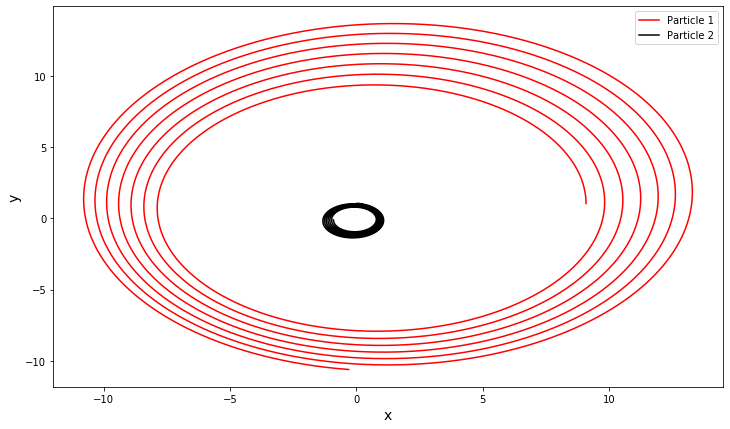

In [5]:
#########Eulers Method###########

import numpy as np
import pylab as pl
import scipy as sp
import matplotlib.patches as patches


N = 10000

#1st particle initial conditions
m1 = 1
P1x, P1y = 8., 1.
v1x, v1y = -0.3, 0.5

#2nd particle initial conditions
m2 = 10.
P2x , P2y = -2., -0.1
v2x, v2y = -0.3, -0.5

Px, Py = [np.zeros(N) for _ in range(2)], [np.zeros(N) for _ in range(2)] #arrays for positions of both particles
vx, vy = [np.zeros(N) for _ in range(2)], [np.zeros(N) for _ in range(2)] #arrays for velocities of both particles

c_mx = (m1*P1x + m2*P2x)/(m1 + m2)          #center of mass in the x direction
c_my =(m1*P1y + m2*P2y)/(m1 + m2)           #center of mass in the y direction
 
v_cx = (m1*v1x + m2*v2x)/(m1 + m2)          #center of mass velocity definition
v_cy = (m1*v1y + m2*v2y)/(m1 + m2)

P1x = P1x - c_mx                    #center of mass correction in the x-direction for both particles 
P2x = P2x - c_mx

P1y = P1y - c_my                    #center of mass correction in the y-directon for both particles       
P2y = P2y - c_my

v1x = v1x - v_cx                   #center of mass velocity correction
v1y = v1y - v_cy

v2x = v2x - v_cx
v2y = v2y - v_cy

def F_e(x1, x2, y1, y2, n):              #force on the x-direction for both particles
    
    r_sq = (((P2x - P1x)**(2.)) + ((P2y - P1y)**(2.)))   
    F = (-(m1*m2)/(r_sq)**(3/2))
    if n == 1.:
        return (F)*(P1x - P2x)           #force on the x direction
    else:
        return (F)*(P1y - P2y)           #force on the y-direction

def E_e(v1x, v2x, v1y, v2y, P1x, P2x, P1y, P2y):   #defining total energy
    
    r_sq = (((P2x - P1x)**(2.)) + ((P2y - P1y)**(2.)))
    k = 0.5*((v1x - v2x)**2. + (v1y - v2y)**2.)        #kinetic energy of the system
    U = (m1 + m2)/(r_sq**0.5)                          #potential energy of the system
    return k - U

t = 0
E, time = np.zeros(N), []  #energy array and empty list for time
    
for i in range(N):
    
    h =  0.05
    E[i] = E_e(v1x, v2x, v1y, v2y, P1x, P2x, P1y, P2y)
    t = t + h
    time.append(t)

    #Position-Euler implementation for particle 1
    
    Pnx1 = P1x + (v1x)*(h)
    Px[0][i] = Pnx1             #throwing x1 positions

    Pny1 = P1y + (v1y)*(h)
    Py[0][i] = Pny1             #throwing y1 positions    
        
    #Velocity-Euler implementation for particle 1
    
    vnx1 = v1x + (h)*((F_e(P1x, P2x, P1y, P2y, 1))/m1)
    vx[0][i] = vnx1
    
    vny1 = v1y + (h)*((F_e(P1x, P2x, P1y, P2y, 2))/m1)
    vy[0][i] = vny1
    
    #Position-Euler implementation for particle 2
        
    Pnx2 = P2x + (v2x)*(h)
    Px[1][i] = Pnx2             #throwing x2 positions

    Pny2 = P2y + (v2y)*(h)
    Py[1][i] = Pny2             #throwing y2 positions 
    
    #Velocity-Euler implementation for particle 2
    
    vnx2 = v2x + (h)*(-F_e(P1x, P2x, P1y, P2y, 1)/m2)
    vx[1][i] = vnx2
    
    vny2 = v2y + (h)*((-F_e(P1x, P2x, P1y, P2y, 2))/m2)
    vy[1][i] = vny2
    
    P1x, P2x = Pnx1, Pnx2        #updating the positions for both particles
    P1y, P2y = Pny1, Pny2
    
    v1x, v2x = vnx1, vnx2       #updating velocities for both particles
    v1y, v2y = vny1, vny2

#plotting the orbits
pl.figure(figsize = (12, 7))
pl.plot(Px[0], Py[0], 'r-', label = 'Particle 1')
pl.plot(Px[1], Py[1], 'k-', label = 'Particle 2')
pl.xlabel('x', fontsize = 14)
pl.ylabel('y', fontsize = 14)
pl.legend()
pl.savefig('Euler.eps', format = 'eps', dpi = 150)
pl.show()

###plotting total energy
#pl.figure(figsize = (12, 7))
#pl.plot(time, E, 'k-')
#pl.xlabel('time [s]', fontsize = 14)
#pl.ylabel('Energy', fontsize = 14)
#pl.savefig('Energy_euler.eps', format = 'eps', dpi = 150)
#pl.show()

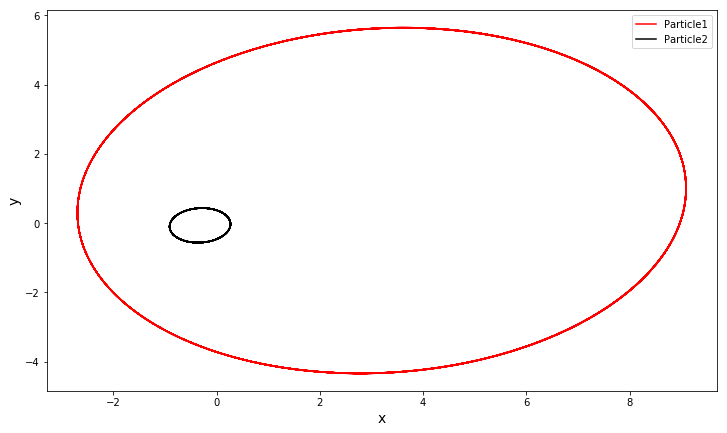

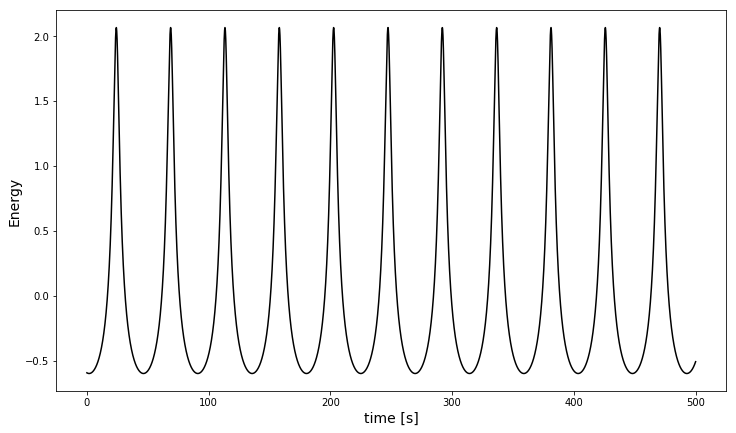

In [114]:
#########Leapfrog############

import numpy as np
import pylab as pl
import scipy as sp

N = 10000

#1st particle initial conditions
m1 = 1
x1, y1 = 8., 1.
vx_1, vy_1 = -0.3, 0.5

#2nd particle initial conditions
m2 = 10.
x2 , y2 = -2., -0.1
vx_2, vy_2 = -0.3, -0.5

Px, Py = [np.zeros(N) for _ in range(2)], [np.zeros(N) for _ in range(2)]  #empty arrays for positions
vx, vy = [np.zeros(N) for _ in range(2)], [np.zeros(N) for _ in range(2)]   # empty arrays for velocities

c_mx = (m1*x1 + m2*x2)/(m1 + m2)     #center of mass in the position-x
c_my = (m1*y1 + m2*y2)/(m1 + m2)     #center of mass in position-y

v_xc = (m1*vx_1 + m2*vx_2)/(m1 + m2)  #center of mass velocity definition
v_yc = (m1*vy_1 + m2*vy_2)/(m1 + m2)

x1 = x1 - c_mx                      #center of mass correction on x for particle 1 and 2
x2 = x2 - c_mx          

y1 = y1 - c_my                      #center of mass correction on y for particle 1 and 2                   
y2 = y2 - c_my 

vx_1, vx_2 = vx_1 - v_cx, vx_2 - v_cx    #center of mass velocity correction 
vy_1, vy_2 = vy_1 - v_cy, vy_2 - v_cy


def F(x1, x2, y1, y2, n):              #definition of the force for both particles
    
    r_sq = (((x2 - x1)**(2.)) + ((y2 - y1)**(2.)))   
    F = (-(m1*m2)/(r_sq)**(3/2))
    if n == 1.:
        return (F)*(x1 - x2)
    else:
        return (F)*(y1 - y2)

def E_l(vx_1, vx_2, vy_1, vy_2, x1, x2, y1, y2):     #function for the total energy
    
    r_sq = (((x2 - x1)**(2.)) + ((y2 - y1)**(2.)))
    k = 0.5*((vx_1 - vx_2)**2. + (vy_1 - vy_2)**2.)   #kinetic energy
    U = (m1 + m2)/(r_sq**0.5)                         #potential energy
    return k - U

t = 0
E = np.zeros(N)   #energy empty array
time = []          #time array

for i in range(N):
        
    h = 0.05
    t = t + h
    time.append(t)
    E[i] = E_l(vx_1, vx_2, vy_1, vy_2, x1, x2, y1, y2)

    x1_h = x1 + vx_1*(0.5*h)     #leapfrog at half position-x for particle1 
    y1_h = y1 + vy_1*(0.5*h)     #leapfrog at half position-y for particle1
    
    x2_h = x2 + vx_2*(0.5*h)    #leapfrog at half position-x for particle2
    y2_h = y2 + vy_2*(0.5*h)    #leapfrog at half position-y for particle2 
    
    x1, x2 = x1_h, x2_h
    y1, y2 = y1_h, y2_h
        
    vxf_1 = vx_1 + h*(F(x1, x2, y1, y2, 1))       #leapfrog implemenation of the velocity-x for particle1
    vyf_1 = vy_1 + h*(F(x1, x2, y1, y2, 2))       #leapfrog implemenation of the velocity-y for particle2
    
    vxf_2 = vx_2 + (-F(x1, x2, y1, y2, 1)/m2)*h
    vyf_2 = vy_2 + (-F(x1, x2, y1, y2, 2)/m2)*h
    
    vx_1, vx_2 = vxf_1, vxf_2                #updating x and y velocities
    vy_1, vy_2 = vyf_1, vyf_2

    x1_f = x1_h + vx_1*(0.5*h)  #leapfrog at full position-x for particle1 
    Px[0][i] = x1_f
    
    y1_f = y1_h + vy_1*(0.5*h)  #leapfrog at full position-y for particle 
    Py[0][i] = y1_f

    x2_f = x2_h + vx_2*(0.5*h)  #leapfrog at full position-x for particle2 
    Px[1][i] = x2_f
    
    y2_f = y2_h + vy_2*(0.5*h)   #leapfrog at full position-y for particle2 
    Py[1][i] = y2_f

##plotting the orbits

pl.figure(figsize = (12, 7))
pl.plot(Px[0], Py[0], 'r-', label = 'Particle1')
pl.plot(Px[1], Py[1], 'k-', label = 'Particle2')
pl.xlabel('x', fontsize = 14)
pl.ylabel('y', fontsize = 14)
pl.legend()
pl.savefig('Leap.eps', format = 'eps', dpi = 150)
pl.show()

##plotting totat energy

pl.figure(figsize = (12, 7))
pl.plot(time, E, 'k-')
pl.xlabel('time [s]', fontsize = 14)
pl.ylabel('Energy', fontsize = 14)
pl.savefig('Energy_leapfrog.eps', format = 'eps', dpi = 150)
pl.show()

### $\textit{Question 5}$


In [7]:
#   This notebook is meant to host routines for
#   reading in Gadget snapshots using Merideth's
#   code (see readsnap_binary_merideth) and place them
#   into the Galaxy Class
import readsnap_binary_meridith as rsbm

def GadgetInputComponent(File,CompID):
    f = open(File,"r+b")              #Open the binary file
    Header = rsbm.load_gadget_binary_header(f)        #Read in the header
    nP = Header['NumPart_ThisFile']               #Get the number of particles
    skip_bh = 0                       #Set skip_bh=0 as a default value
    if nP[CompID] > 0:              #Make sure there are particles in the component
        PDict = rsbm.load_gadget_binary_particledat(f,Header,CompID,skip_bh)  #Read the data into a dictionary
    elif nP[CompID] == 0:
        print("No particles of type: ", CompID)     #Give an error message if no particles
        print("Stopping program")
        quit()              #Kill the program if there are no particles
        
    f.close()       #Close the file
#       Select the particle mass, position, velocity, and id arrays
    Pos = np.array(PDict['Coordinates'])
    Vel = np.array(PDict['Velocities'])
    Mass = np.array(PDict['Masses'])
    PID = np.array(PDict['ParticleIDs'])
    return PID, Mass, Pos, Vel             #Return the selected arrays
disk = GadgetInputComponent('snapshot_100', 2)

no_particles = len(disk[0])
print('The number of disk particles = ', no_particles)

The number of disk particles =  53857
